## Importing Libraries and Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/precog/data/All_States_GE.csv')

<ipython-input-2-aa7087c45eb5>:1: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/precog/data/All_States_GE.csv')


## Preprocessing

In [3]:
df.shape

(91669, 45)

In [4]:
df.columns

Index(['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month',
       'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'Sub_Region', 'N_Cand', 'Turnout_Percentage',
       'Vote_Share_Percentage', 'Deposit_Lost', 'Margin', 'Margin_Percentage',
       'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID', 'last_poll', 'Contested',
       'Last_Party', 'Last_Party_ID', 'Last_Constituency_Name',
       'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent',
       'Recontest', 'MyNeta_education', 'TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc',
       'Election_Type'],
      dtype='object')

In [5]:
df['Year'] = df['Year'].astype(np.int64)

In [6]:
bool_cols = ['Deposit_Lost', 'Turncoat', 'Incumbent', 'Same_Party', 'Same_Constituency', 'Recontest']
for col in bool_cols:
    df[col] = df[col].replace({'yes': 1, 'no': 0}).astype(np.float64)

df['last_poll'] = df['last_poll'].replace({True: 1, False: 0}).astype(np.float64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91669 entries, 0 to 91668
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Name              91669 non-null  object 
 1   Assembly_No             91669 non-null  int64  
 2   Constituency_No         91669 non-null  int64  
 3   Year                    91669 non-null  int64  
 4   month                   88590 non-null  float64
 5   Poll_No                 91669 non-null  int64  
 6   DelimID                 91669 non-null  int64  
 7   Position                91669 non-null  int64  
 8   Candidate               91669 non-null  object 
 9   Sex                     89466 non-null  object 
 10  Party                   91648 non-null  object 
 11  Votes                   91665 non-null  float64
 12  Candidate_Type          29979 non-null  object 
 13  Valid_Votes             91669 non-null  int64  
 14  Electors                91649 non-null

In [8]:
df.describe()

,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Votes,Valid_Votes,Electors,...,Party_ID,last_poll,Contested,Last_Party_ID,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest
count,91669.000000,91669.000000,91669.000000,88590.000000,91669.000000,91669.000000,91669.000000,9.166500e+04,9.166900e+04,9.164900e+04,...,91435.000000,91669.000000,90562.000000,17805.000000,17816.000000,17816.000000,90562.000000,90562.000000,90562.000000,90562.000000
mean,11.447360,21.916635,1996.553033,4.958901,0.031057,3.181861,12.038388,5.250177e+04,6.612916e+05,1.126394e+06,...,9080.210587,0.967448,1.389998,7504.654591,0.803828,0.723058,0.251618,0.031879,0.057795,0.148351
std,3.792191,18.847940,14.470426,2.917823,0.175288,0.631886,28.582320,1.110214e+05,2.907476e+05,4.245669e+05,...,4241.367095,0.177462,1.034613,4577.733355,0.397111,0.447500,0.797915,0.175678,0.233356,0.355450
min,3.000000,1.000000,1962.000000,1.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,7.000000,1989.000000,4.000000,0.000000,3.000000,3.000000,1.002000e+03,4.464150e+05,8.403100e+05,...,5533.000000,1.000000,1.000000,3482.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,17.000000,1996.000000,4.000000,0.000000,3.000000,7.000000,3.309000e+03,6.327130e+05,1.103327e+06,...,10809.000000,1.000000,1.000000,8247.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,32.000000,2009.000000,5.000000,0.000000,4.000000,13.000000,2.826300e+04,8.349570e+05,1.409202e+06,...,10809.000000,1.000000,1.000000,10809.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,17.000000,86.000000,2021.000000,12.000000,2.000000,4.000000,480.000000,1.068569e+06,1.763757e+06,3.623806e+06,...,25160.000000,1.000000,14.000000,18721.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000


In [9]:
df.drop(columns = ['Election_Type'], axis=1, inplace=True)

In [10]:
# Replace 'None of the Above' with 'NOTA' in the 'Candidate' column
df['Candidate'] = df['Candidate'].replace('None of the Above', 'NOTA')
df['Candidate_Type'] = df['Candidate_Type'].replace('Gen', 'GEN')
df['Candidate_Type'] = df['Candidate_Type'].replace('GENERAL', 'GEN')
df['Candidate_Type'] = df['Candidate_Type'].replace('general', 'GEN')
df['Candidate_Type'] = df['Candidate_Type'].replace('st', 'ST')
df['Candidate_Type'] = df['Candidate_Type'].replace('sc', 'ST')

In [11]:
df['Candidate_Type'].value_counts()

GEN    19918
SC      7539
ST      2522
Name: Candidate_Type, dtype: int64

In [12]:
NOTA_candidate = ['Deposit_Lost', 'pid', 'Contested', 'No_Terms', 'Turncoat', 'Incumbent', 'Recontest']

for column in NOTA_candidate:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column] = df[column].fillna(-1).astype(np.float64)
    elif df[column].dtype == 'object':
        df[column].fillna('NOTA', inplace=True)

In [13]:
firsttime_candidate = ['Last_Party', 'Last_Party_ID', 'Last_Constituency_Name', 'Same_Constituency', 'Same_Party']

for column in firsttime_candidate:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column] = df[column].fillna(-1).astype(np.float64)
    elif df[column].dtype == 'object':
        df[column].fillna('NA', inplace=True)
df['Sub_Region'].fillna('NA', inplace=True)

In [14]:
for col in df.columns:
    if(df[col].isnull().sum()!=0):print(f'{col}: {df[col].isnull().sum()}')

month: 3079
Sex: 2203
Party: 21
Votes: 4
Candidate_Type: 61690
Electors: 20
Turnout_Percentage: 20
Vote_Share_Percentage: 20
Margin: 1
Margin_Percentage: 20
ENOP: 20
Party_Type_TCPD: 275
Party_ID: 234
MyNeta_education: 66547
TCPD_Prof_Main: 65415
TCPD_Prof_Main_Desc: 85686
TCPD_Prof_Second: 89116
TCPD_Prof_Second_Desc: 90988


In [15]:
# Drop rows where 'Party' column is null
df.dropna(subset=['Party','Votes', 'Electors','ENOP'], inplace=True)

In [16]:
df.drop(columns = ['TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc'], axis=1, inplace=True)

In [17]:
for col in df.columns:
    if(df[col].isnull().sum()!=0):print(f'{col}: {df[col].isnull().sum()}')

month: 3031
Sex: 2162
Candidate_Type: 61635
Party_Type_TCPD: 254
Party_ID: 213
MyNeta_education: 66486
TCPD_Prof_Main: 65354


In [18]:
TCPD_cols = ['TCPD_Prof_Main', 'MyNeta_education' , 'Candidate_Type', 'Party_Type_TCPD']

for column in TCPD_cols:
    df[column].fillna('unspecified', inplace=True)
df['Party_ID'].fillna(-1, inplace=True)

In [19]:
for col in df.columns:
    if(df[col].isnull().sum()!=0):print(f'{col}: {df[col].isnull().sum()}')

month: 3031
Sex: 2162


In [20]:
df['Sex'] = df['Sex'].replace('female', 'F')
df['Sex'] = df['Sex'].replace('FEMALE', 'F')
df['Sex'] = df['Sex'].replace('MALE', 'M')
df['Sex'] = df['Sex'].replace('male', 'M')

In [21]:
df['Sex'].value_counts()

M       84153
F        4738
NOTA      543
O          12
Name: Sex, dtype: int64

In [22]:
categorical_columns_to_fill = ['Sex', 'month']

import random

# Fill missing values using random sampling
for column in categorical_columns_to_fill:
    missing_indices = df[df[column].isnull()].index
    existing_values = df[column].dropna().unique()

    for index in missing_indices:
        random_value = random.choice(existing_values)
        df.at[index, column] = random_value

# Verify the distribution after filling missing values
for column in categorical_columns_to_fill:
    print(f'Distribution of {column} after filling missing values:')
    print(df[column].value_counts())
    print()


Distribution of Sex after filling missing values:
M       84693
F        5266
NOTA     1085
O         564
Name: Sex, dtype: int64

Distribution of month after filling missing values:
4.0     45252
3.0     10333
5.0      9023
11.0     6557
12.0     5701
9.0      5030
1.0      5015
2.0      4697
Name: month, dtype: int64



In [23]:
df.shape

(91608, 41)

In [24]:
df.columns

Index(['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month',
       'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'Sub_Region', 'N_Cand', 'Turnout_Percentage',
       'Vote_Share_Percentage', 'Deposit_Lost', 'Margin', 'Margin_Percentage',
       'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID', 'last_poll', 'Contested',
       'Last_Party', 'Last_Party_ID', 'Last_Constituency_Name',
       'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent',
       'Recontest', 'MyNeta_education', 'TCPD_Prof_Main'],
      dtype='object')

In [25]:
# df['pid'].value_counts().index.tolist()

In [26]:
df['pid'].value_counts()

NOTA         1086
GEAP81777      52
AEOD84580      20
GEBR31195      13
GEDL60727      13
             ... 
GEUP72662       1
GEUP72665       1
GEUP72666       1
GEUP72668       1
GEUP83660       1
Name: pid, Length: 72471, dtype: int64

In [27]:
df.drop(columns = ['Last_Party', 'Party', 'Candidate', 'Margin', 'Votes', 'pid', 'Constituency_Name', 'Last_Constituency_Name'], axis=1, inplace=True)

In [28]:
features_to_encode = []
for col in df.columns:
    if(df[col].dtype == 'object'):
      print(f'{col}: {df[col].nunique()}')
      features_to_encode.append(col)


State_Name: 40
Sex: 4
Candidate_Type: 4
Constituency_Type: 3
Sub_Region: 8
Party_Type_TCPD: 7
MyNeta_education: 12
TCPD_Prof_Main: 18


In [29]:
# df['Assembly_No'].value_counts()

## Adding Target Feature

In [30]:
for y in df['Assembly_No'].unique():
    df_year = df[df['Assembly_No'] == y]
    print(f"Assembly Number: {y}")
    print(df_year['Margin_Percentage'].describe())
    print()

Assembly Number: 17
count    8701.000000
mean        3.321573
std         8.949459
min         0.000000
25%         0.010000
50%         0.040000
75%         0.310000
max        52.730000
Name: Margin_Percentage, dtype: float64

Assembly Number: 16
count    9078.000000
mean        2.973337
std         7.705883
min         0.000000
25%         0.010000
50%         0.050000
75%         0.460000
max        56.250000
Name: Margin_Percentage, dtype: float64

Assembly Number: 15
count    8313.000000
mean        2.952025
std         7.706753
min         0.000000
25%         0.010000
50%         0.060000
75%         0.690000
max        70.100000
Name: Margin_Percentage, dtype: float64

Assembly Number: 14
count    5942.000000
mean        4.619655
std         9.837980
min         0.000000
25%         0.020000
50%         0.170000
75%         2.700000
max        70.830000
Name: Margin_Percentage, dtype: float64

Assembly Number: 13
count    4871.000000
mean        5.461542
std        10.769183
m

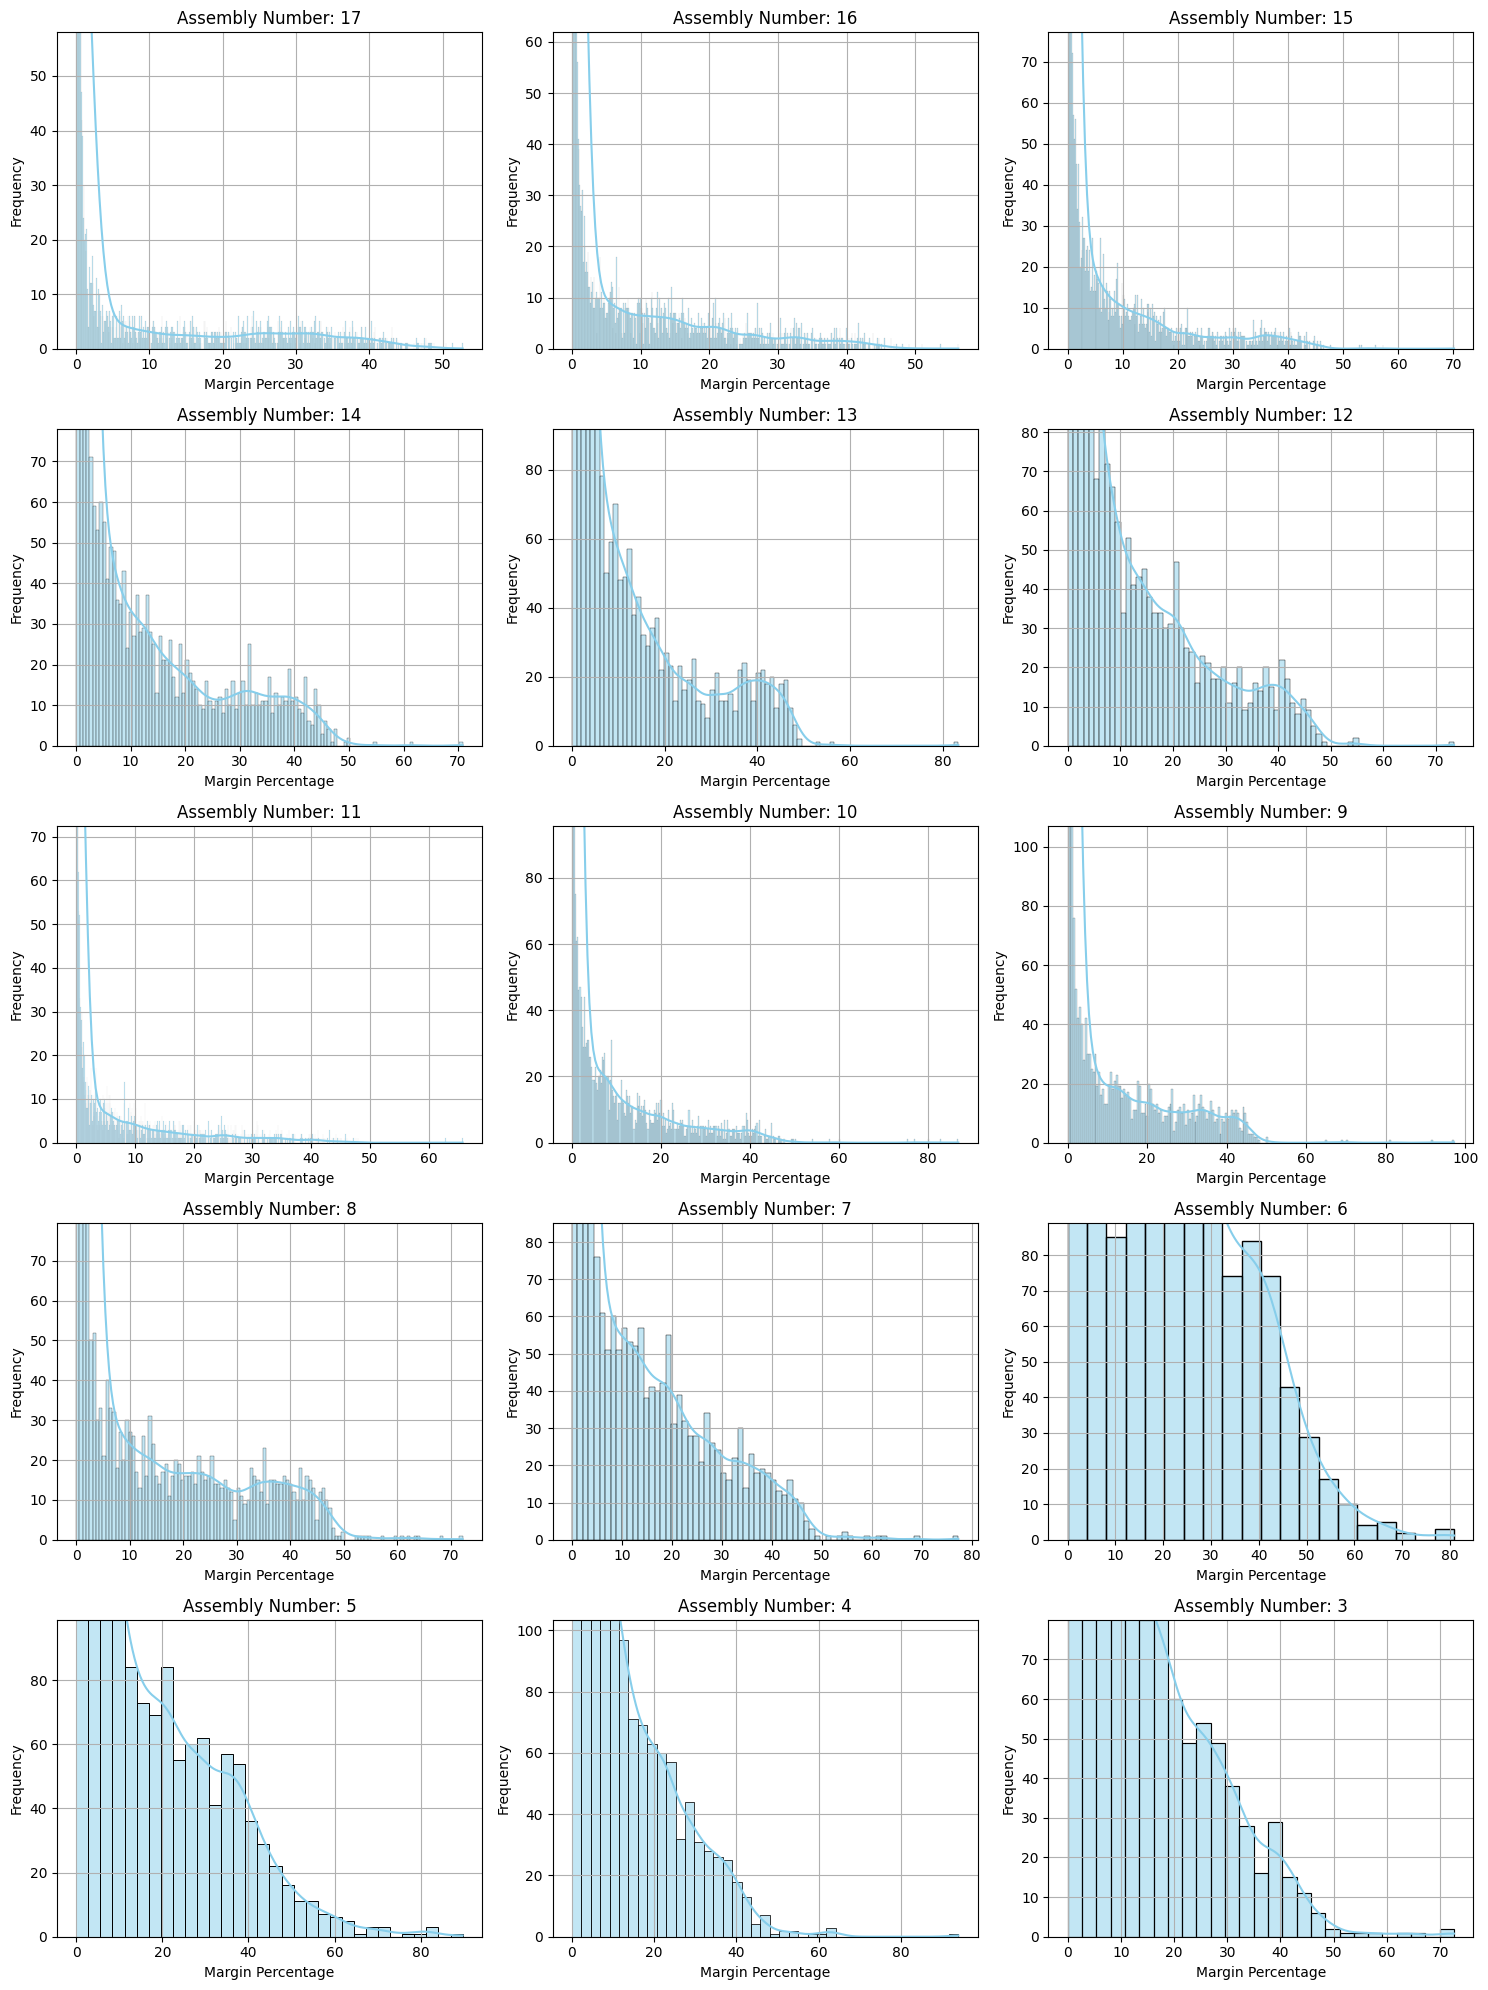

In [31]:
import matplotlib.pyplot as plt

# Create subplots with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through each unique Assembly_No (year)
for i, y in enumerate(df['Assembly_No'].unique()):
    # Filter the data for the current year and exclude Margin_Percentage = 0
    df_year = df[(df['Assembly_No'] == y) & (df['Margin_Percentage'] > 0)]

    # Plot the distribution of Margin_Percentage for the current year
    sns.histplot(data=df_year, x='Margin_Percentage', kde=True, ax=axes[i], color='skyblue')

    # Set title and axis labels for each subplot
    axes[i].set_title(f"Assembly Number: {y}")
    axes[i].set_xlabel('Margin Percentage')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

    # Calculate the maximum value of 'Margin_Percentage' for the current year
    max_margin_percentage = df_year['Margin_Percentage'].max()

    # Set the y-axis limit based on the maximum value (add some padding for better visualization)
    axes[i].set_ylim(0, max_margin_percentage + max_margin_percentage * 0.1)

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
import numpy as np

# Example thresholds based on percentiles (you can adjust these values as needed)
low_margin_threshold = 25   # Margin_Percentage <= 25th percentile
medium_margin_threshold = 75  # 25th percentile < Margin_Percentage <= 75th percentile
high_margin_threshold = 90    # Margin_Percentage > 90th percentile

# Calculate the percentiles for each assembly number
percentiles_by_assembly = df.groupby('Assembly_No')['Margin_Percentage'].quantile([0.25, 0.75, 0.90]).unstack()

In [33]:
# Function to categorize margin into low, medium, or high based on thresholds
def categorize_margin(margin, thresholds):
    if margin <= thresholds[0.25]:
        return 'Low'
    elif margin <= thresholds[0.75]:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization function to create a new column 'Margin_Category'
df['Margin_Category'] = df.apply(lambda row: categorize_margin(row['Margin_Percentage'], percentiles_by_assembly.loc[row['Assembly_No']]), axis=1)

# Display the counts of each margin category for each assembly number
margin_counts_by_assembly = df.groupby(['Assembly_No', 'Margin_Category']).size().unstack(fill_value=0)
print(margin_counts_by_assembly)

Margin_Category  High   Low  Medium
Assembly_No                        
3                 509   509    1016
4                 627   636    1248
5                 709   711    1414
6                 649   665    1283
7                1209  1259    2367
8                1452  1574    2794
9                1540  2093    2525
10               2279  2697    4145
11               3477  5518    5031
12               1192  1196    2379
13               1217  1397    2257
14               1485  1687    2770
15               2073  2408    3832
16               2255  2771    4052
17               2158  3266    3277


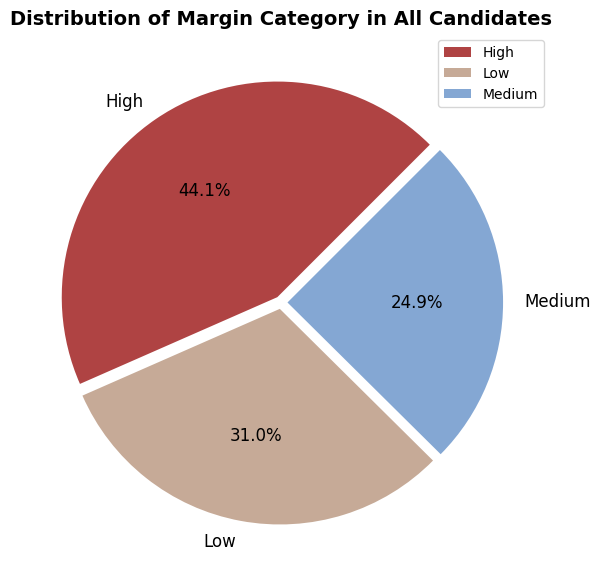

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Labels and values for the first pie chart (Distribution of Margin_Category in Candidates)
labels_1 = ["High", "Low", "Medium"]
values_1 = df['Margin_Category'].value_counts()

# Colors for the first pie chart
colors_1 = ['#AF4343', '#C6AA97', '#84A7D3']

# Plot the first pie chart
ax.pie(x=values_1, labels=labels_1, autopct="%1.1f%%", startangle=45, explode=[0.03, 0.03, 0.03],
       colors=colors_1, textprops={'fontsize': 12, 'color': 'black'})

# Set title and formatting for the first pie chart
ax.set_title("Distribution of Margin Category in All Candidates", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_facecolor('#F0F0F0')
ax.legend(labels_1, loc='best')

# Set aspect ratio to be equal to make the pie chart perfectly circular
ax.set_aspect('equal')

plt.show()

In [35]:
df.drop(columns='Margin_Percentage', axis=1, inplace = True)

In [36]:
df.shape

(91608, 33)

In [37]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=features_to_encode)

In [38]:
df_encoded.shape

(91608, 121)

## Importing Libraries

In [39]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ROCAUC
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import graphviz

from sklearn.neighbors import KNeighborsClassifier

## Splitting Data

In [40]:
# Encode the target variable 'Margin_Category' into integer labels
label_encoder = LabelEncoder()
df_encoded['Margin_Category'] = label_encoder.fit_transform(df_encoded['Margin_Category'])

In [41]:
# Split the data into features (X) and the target variable (y)
X = df_encoded.drop(columns=['Margin_Category'], axis = 1)
y = df_encoded['Margin_Category']

# Split the data into training (70%), testing (15%), and validation (15%) sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [42]:
X.head()

,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Valid_Votes,Electors,N_Cand,...,TCPD_Prof_Main_Politics,TCPD_Prof_Main_Religious Occupation,TCPD_Prof_Main_Retired or Pension,TCPD_Prof_Main_Salaried Work or Employed,TCPD_Prof_Main_Small Business or Self-employed,TCPD_Prof_Main_Social Work,TCPD_Prof_Main_Student,TCPD_Prof_Main_Traditional Occupation,TCPD_Prof_Main_Unemployed,TCPD_Prof_Main_unspecified
0,17,1,2019,4.0,0,4,1,207296,318471.0,15,...,0,0,0,0,0,0,0,0,0,0
1,17,1,2019,4.0,0,4,2,207296,318471.0,15,...,0,0,0,0,0,0,0,0,0,0
2,17,1,2019,4.0,0,4,3,207296,318471.0,15,...,0,0,0,0,0,0,0,0,0,0
3,17,1,2019,4.0,0,4,4,207296,318471.0,15,...,0,0,0,0,0,0,0,0,0,0
4,17,1,2019,4.0,0,4,5,207296,318471.0,15,...,0,0,0,0,0,1,0,0,0,0


## Evaluation Pipeline

In [43]:
def pipe():
    accuracy = accuracy_score(y_test, y_pred)
    print(f"The Accuracy is: {accuracy*100:.2f}%")

    # Generate a classification report
    visualizer = ClassificationReport(xgb_classifier, classes=label_encoder.classes_)
    visualizer.fit(X_train, y_train)  # Fit the visualizer with the training data
    visualizer.score(X_test, y_test)
    plt.tight_layout()
    plt.show()

    # Generate a confusion matrix
    confusion_matrix_visualizer = ConfusionMatrix(xgb_classifier, classes=label_encoder.classes_)
    confusion_matrix_visualizer.fit(X_train, y_train)  # Fit the visualizer with the training data
    confusion_matrix_visualizer.score(X_test, y_test)
    confusion_matrix_visualizer.show()

    # Generate the ROC curve and ROC-AUC score for each class
    n_classes = len(label_encoder.classes_)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-class Classification')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


# XGBoost

## XGBoost - Training

In [44]:
xgb_classifier = XGBClassifier(num_class=len(label_encoder.classes_), random_state=42)
xgb_classifier.fit(X_train,  y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
# XGBClassifier.plot_importance(xgb_classifier)
# XGBClassifier.to_graphviz(xgb_classifier, num_trees=xgb_classifier.best_iteration)

In [46]:
y_pred = xgb_classifier.predict(X_test)

## XGBoost - Result

The Accuracy is: 85.00%


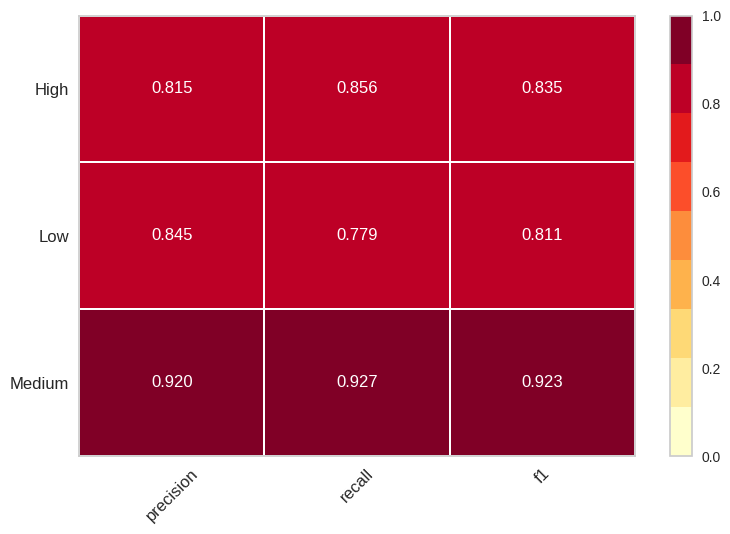

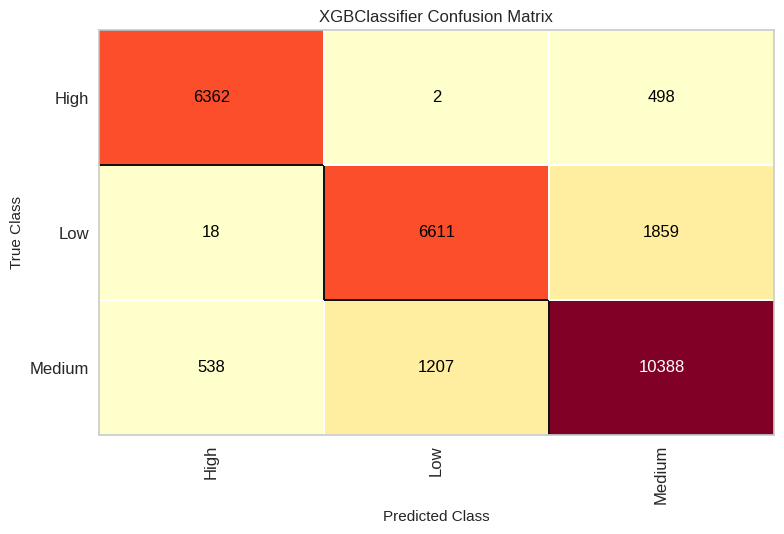

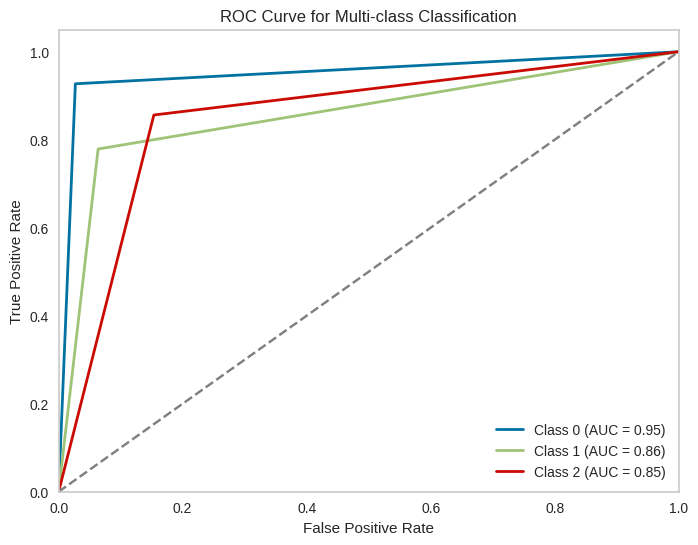

In [47]:
pipe()

# KNN

## KNN - Training

In [48]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)


KNeighborsClassifier()

In [49]:
y_pred = knn_classifier.predict(X_test)

## KNN - Result

The Accuracy is: 52.63%


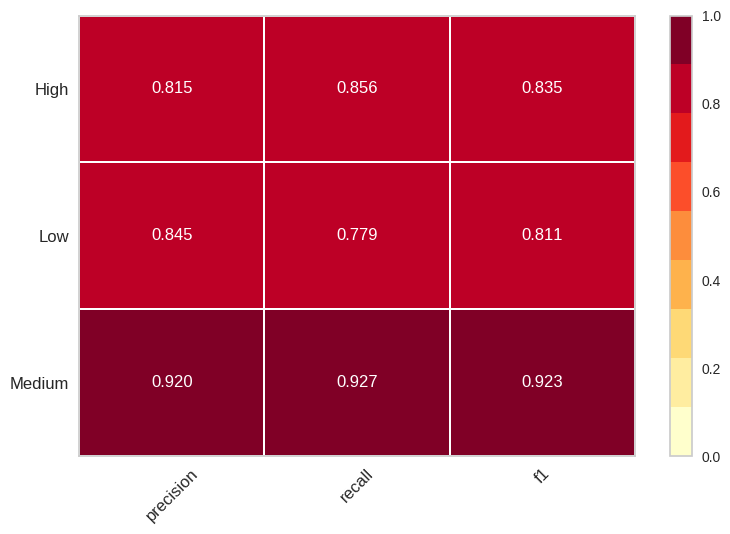

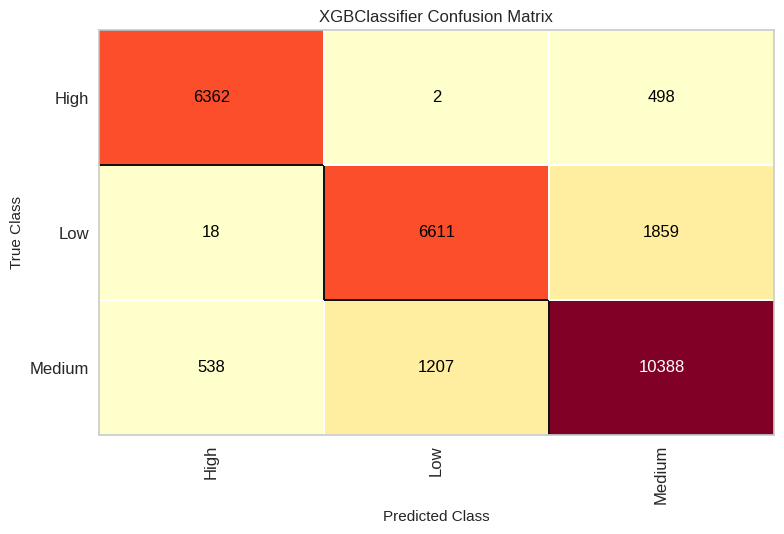

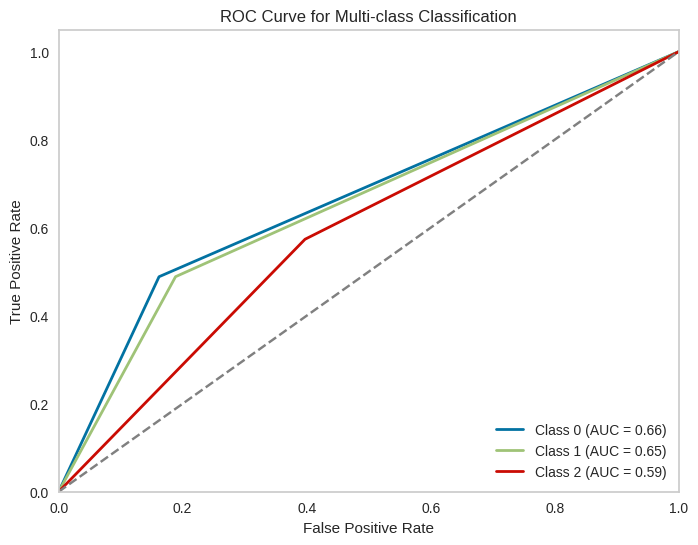

In [50]:
pipe()

# RFC

## Random Forest Classifier - Training

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc_classifier = RandomForestClassifier()
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = rfc_classifier.predict(X_test)

## Random Forest Classifier - Result

The Accuracy is: 78.70%


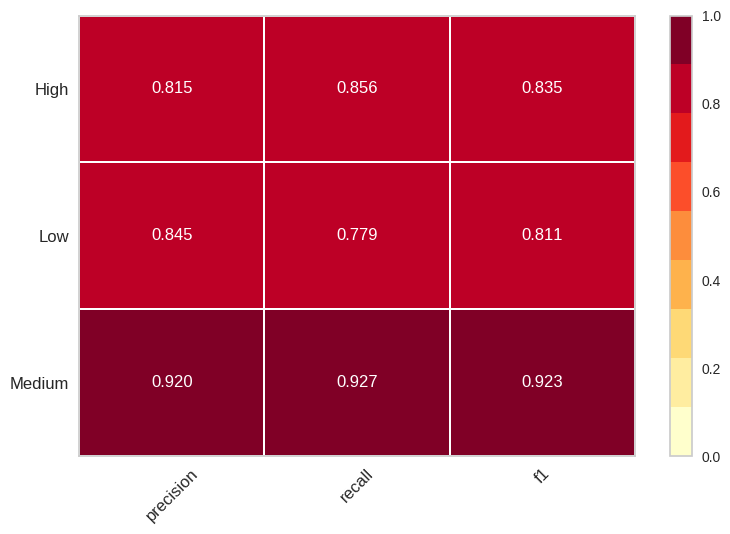

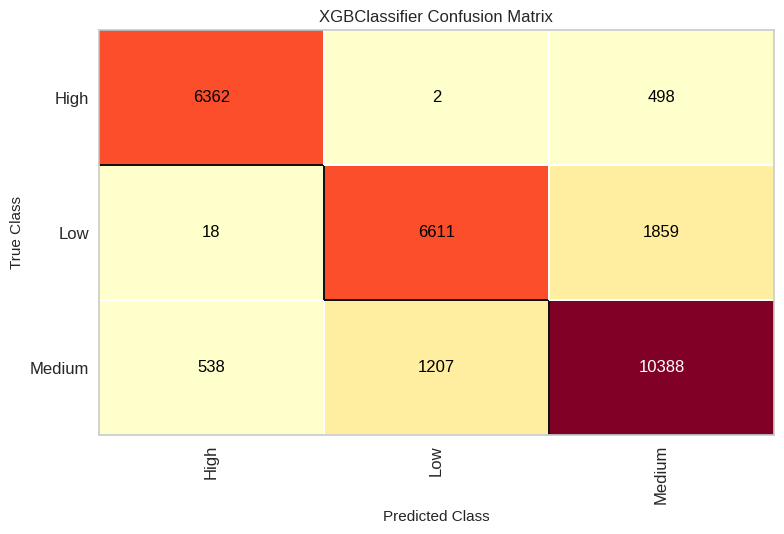

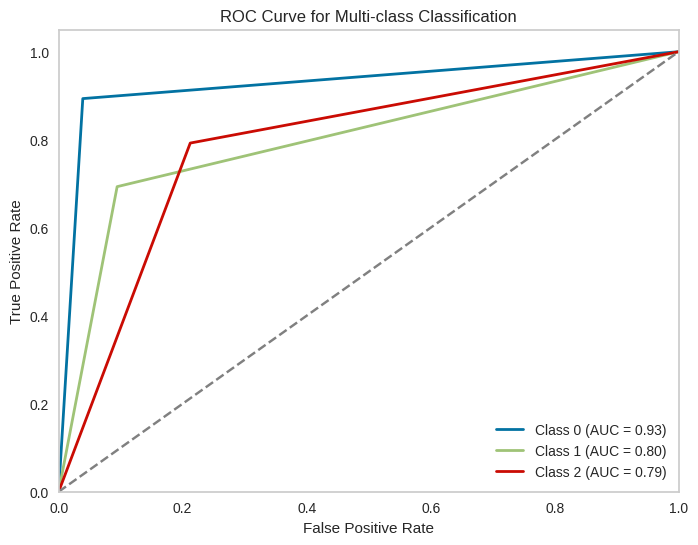

In [54]:
pipe()

## Insights

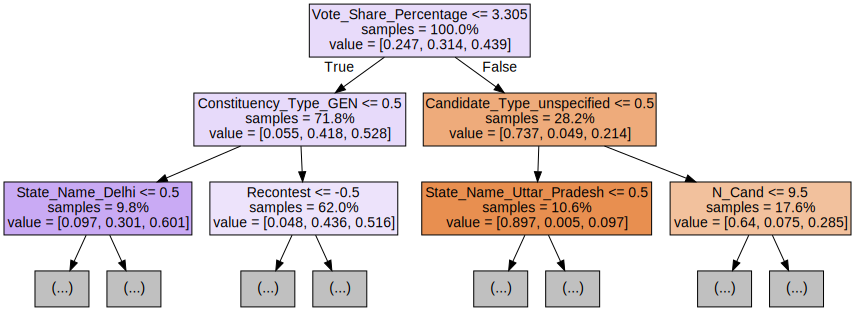

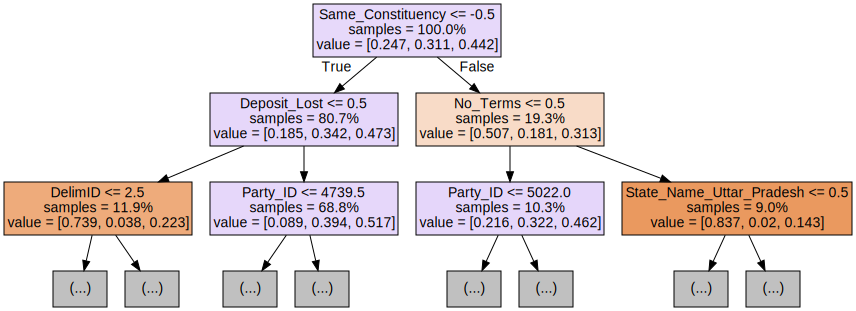

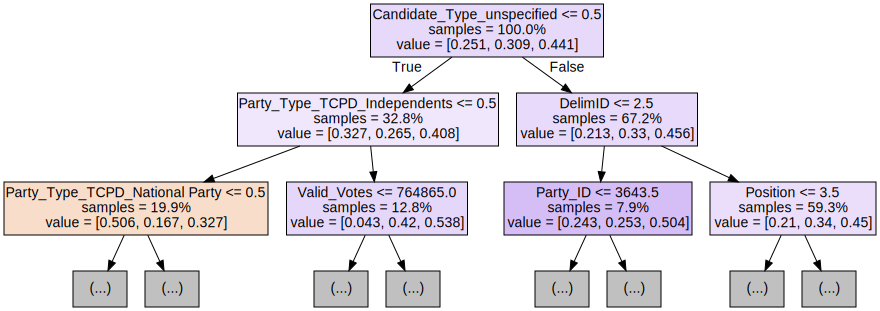

In [55]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rfc_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

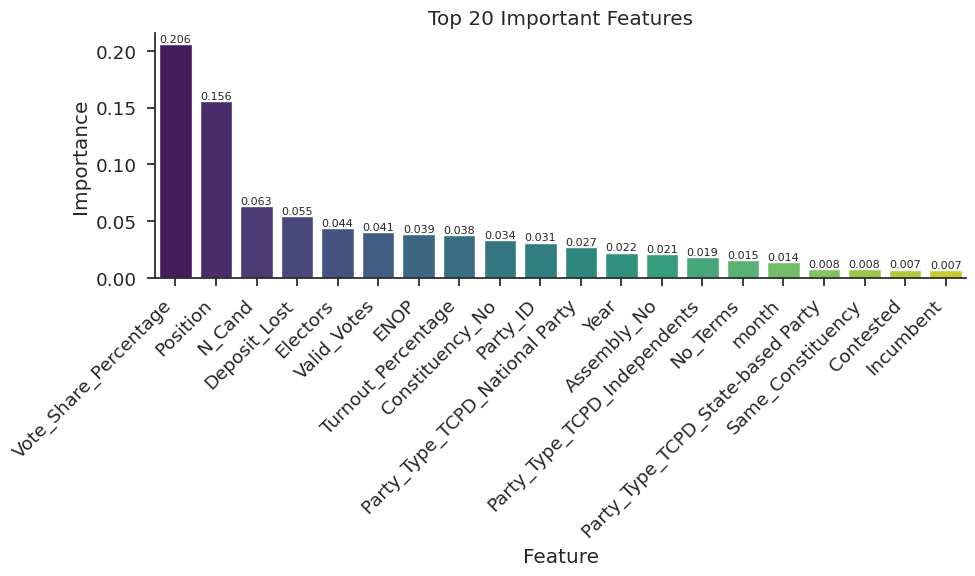

In [56]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rfc_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a bar chart for the top 20 important features
top_20_features = feature_importances[:20]

# Set the style and font scale for the plot
sns.set(style='ticks', font_scale=1.2)

# Create the bar plot with custom colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_20_features.index, y=top_20_features.values, palette='viridis')

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Important Features')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add data labels above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Remove the top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()

# LightBGM

## LightBGM - Training

In [57]:
import lightgbm as lgb

In [58]:
# Replace special characters in column names with underscores
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

In [59]:
# Initialize and fit LightGBM multiclass model with cleaned column names
model = lgb.LGBMClassifier(objective='multiclass',
                           n_estimators=1000,
                           max_depth=4,
                           learning_rate=0.1,
                           reg_lambda=1,
                           random_state=101)
model.fit(X_train, y_train, verbose=False)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(max_depth=4, n_estimators=1000, objective='multiclass',
               random_state=101, reg_lambda=1)

In [60]:
y_pred = model.predict(X_test)

## LightBGM - Result

The Accuracy is: 84.86%


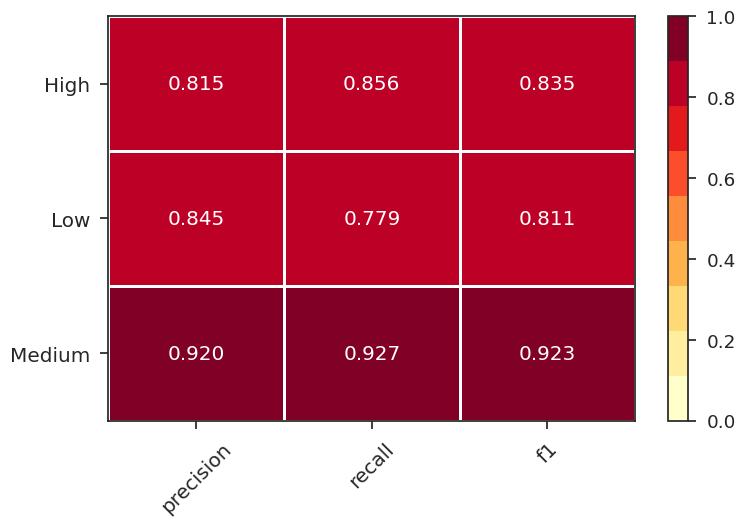

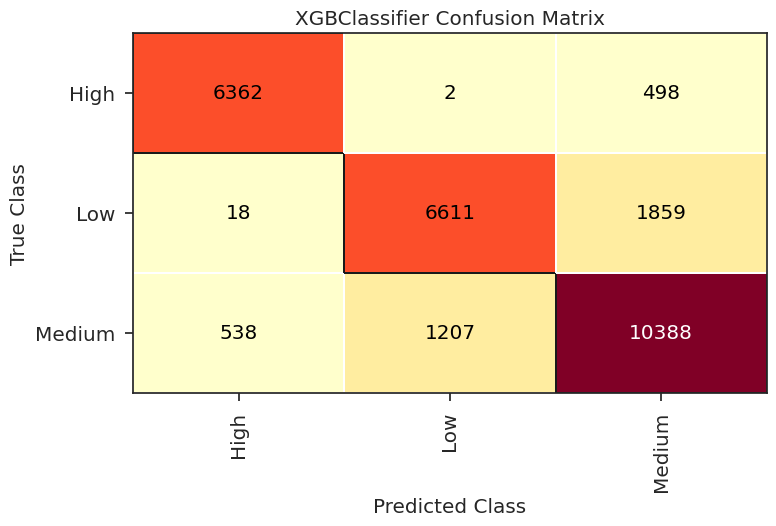

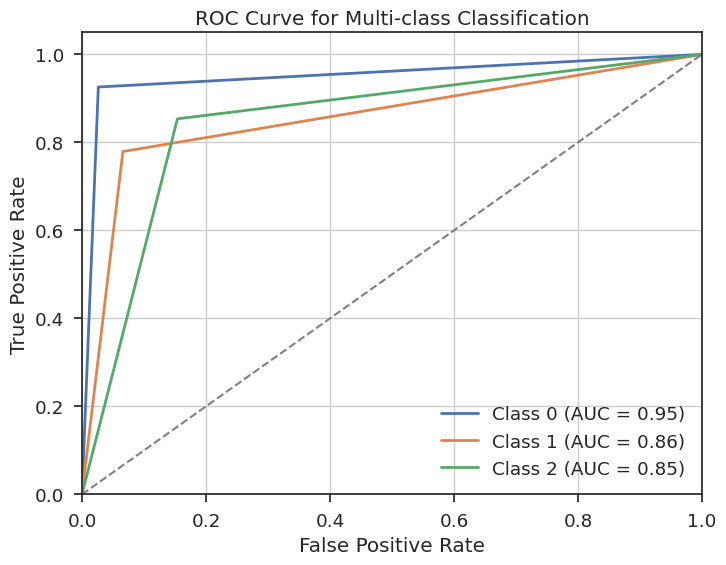

In [61]:
pipe()

## Insights

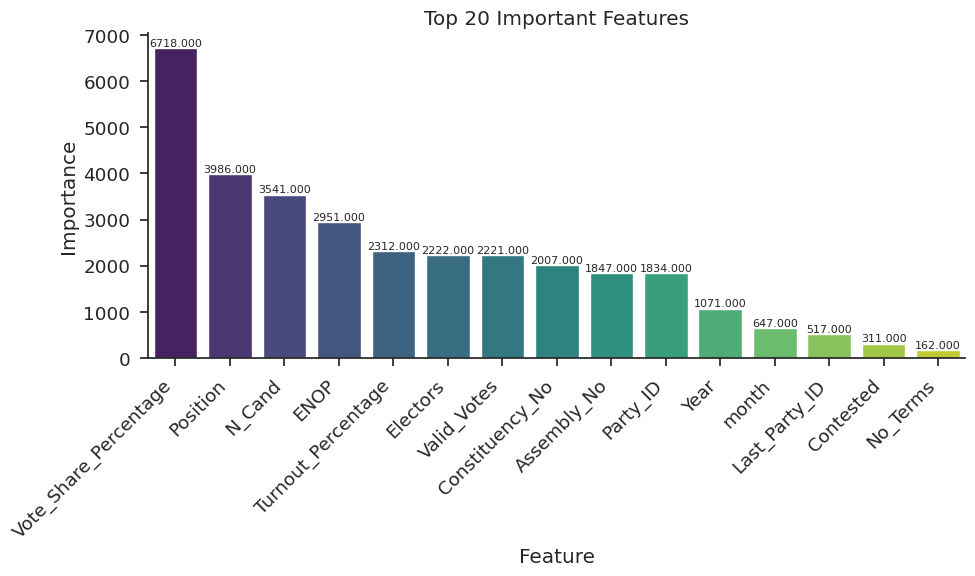

In [62]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a bar chart for the top 15 important features
top_20_features = feature_importances[:15]

# Set the style and font scale for the plot
sns.set(style='ticks', font_scale=1.2)

# Create the bar plot with custom colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_20_features.index, y=top_20_features.values, palette='viridis')

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Important Features')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add data labels above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Remove the top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()